Imports

In [1]:
%load_ext nb_black

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

Read in data and calculate plotting vectors

In [2]:
df = pd.read_csv("./plot.csv", index_col=0)
df.head()

,Name,Tumor Average,Normal Average
0,LINC02082,15625.468244,3654.624071
1,AC090241.2,2182.611638,10211.602054
2,RAB4B,145270.315779,171625.720400
3,None,0.000000,0.000000
4,TIGAR,201397.508295,73306.069305


<IPython.core.display.Javascript object>

In [3]:
df["TN_Ratio"] = df["Tumor Average"] / df["Normal Average"]
df["Log_Tumor"] = np.log(df["Tumor Average"])
df["Log_Normal"] = np.log(df["Normal Average"])
df["Log_TN_Ratio"] = df["Log_Tumor"] / df["Log_Normal"]
df = df.dropna()
df.head()

/home/mvinyard/anaconda3/envs/scutil/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Name,Tumor Average,Normal Average,TN_Ratio,Log_Tumor,Log_Normal,Log_TN_Ratio
0,LINC02082,15625.468244,3654.624071,4.275534,9.656657,8.203749,1.177103
1,AC090241.2,2182.611638,10211.602054,0.213738,7.688277,9.231280,0.832851
2,RAB4B,145270.315779,171625.720400,0.846437,11.886352,12.053071,0.986168
4,TIGAR,201397.508295,73306.069305,2.747351,12.213036,11.202399,1.090216
5,RNF44,169296.986146,282379.086503,0.599538,12.039410,12.551006,0.959239


<IPython.core.display.Javascript object>

Decide on where you want to make cutoffs and call things "over" or "under" expressed. Here I will choose 1.5 as the magic ratio. 

In [4]:
cutoff_ratio = 1.5

df["Under_Expressed"] = df["Log_TN_Ratio"] > cutoff_ratio
df["Over_Expressed"] = df["Log_TN_Ratio"] < 1 / cutoff_ratio

over_exp = df.loc[df["Under_Expressed"] == True]
under_exp = df.loc[df["Over_Expressed"] == True]

<IPython.core.display.Javascript object>

This is from one of my personal packages. I tend to keep functions that I use over and over and put them into a package I maintain called "vintools" which I can just import into any new project that I am starting. I reccomend everyone do something similar, I think it saves time. 

In [5]:
def figure_presets(
    title,
    x_lab,
    y_lab,
    size=(10, 8),
    title_fontsize=20,
    title_adjustment_factor=1.1,
    axis_label_fontsize=15,
):

    """
    presets for one single figure to look nice
    """

    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title, fontsize=title_fontsize, y=title_adjustment_factor)
    ax.set_xlabel(x_lab, fontsize=axis_label_fontsize)
    ax.set_ylabel(y_lab, fontsize=axis_label_fontsize)
    ax.spines["left"].set_linewidth(3)
    ax.spines["bottom"].set_linewidth(3)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")

<IPython.core.display.Javascript object>

This is just a color palette I like. Of course, you can pick **anything** that is stylistically pleasing to you. 

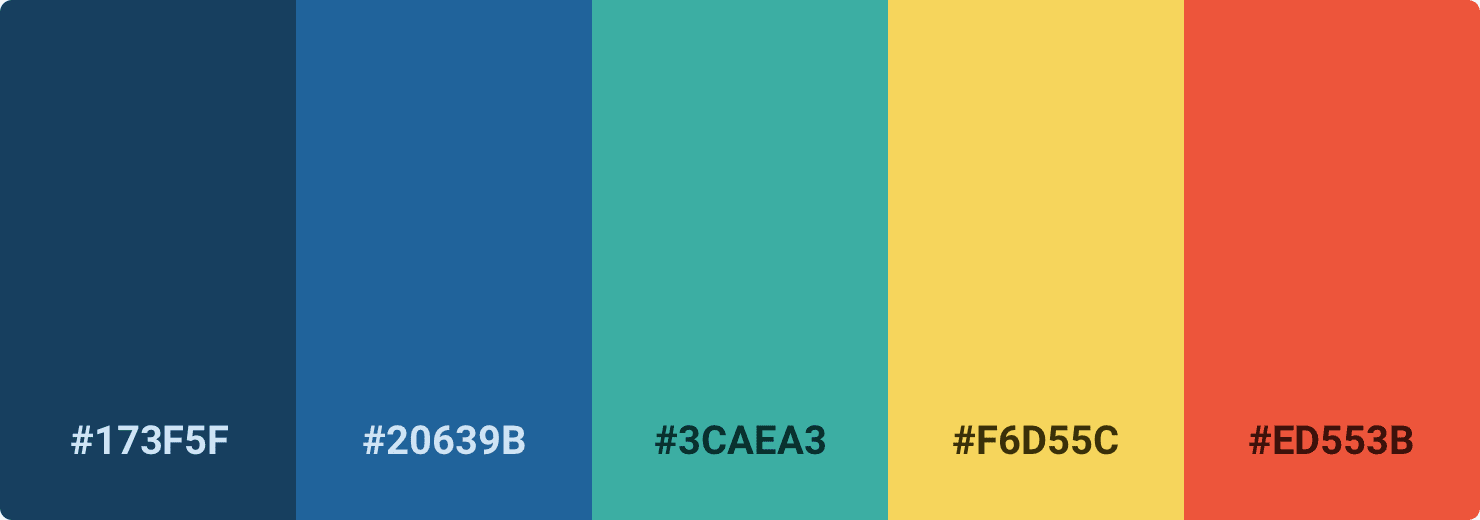

<IPython.core.display.Javascript object>

In [6]:
from IPython.display import Image

Image(filename="color_palette.png")

Let's use the same cutoff ratio from earlier to make coordinates to plot a line on our graph to show the explicit cutoff. 

In [7]:
under_x = np.arange(3, 17)
under_y = under_x * (1 / cutoff_ratio)

over_x = np.arange(3, 15)
over_y = over_x * cutoff_ratio

<IPython.core.display.Javascript object>

If I call my presets function at the beginning of the cell where I want to set up my plot, it will create an empty plot on top of which everything else is created. 

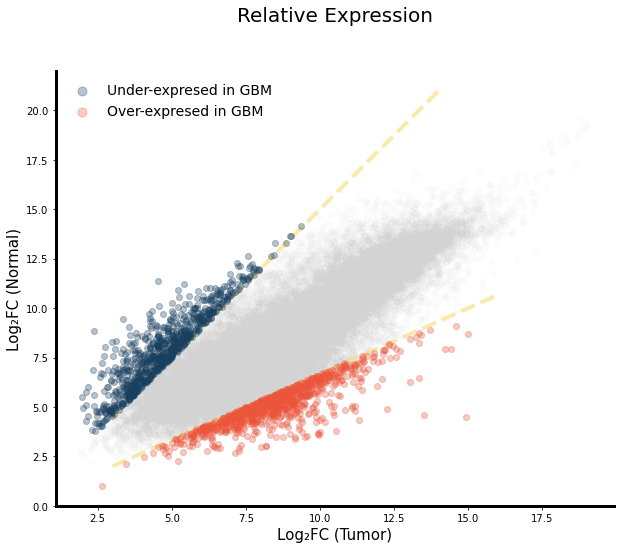

<IPython.core.display.Javascript object>

In [8]:
figure_presets(
    title="Relative Expression",
    x_lab="Log\u2082FC (Tumor)",  # the prefix "\u208" before a number will create a subscript of that number
    y_lab="Log\u2082FC (Normal)",
)

plt.scatter(df["Log_Tumor"], df["Log_Normal"], c="lightgrey", alpha=0.05, zorder=1)
plt.plot(over_x, over_y, "--", lw=4, c="#F6D55C", zorder=2, alpha=0.5)
plt.plot(under_x, under_y, "--", lw=4, c="#F6D55C", zorder=2, alpha=0.5)
plt.scatter(
    under_exp["Log_Tumor"],
    under_exp["Log_Normal"],
    c="#173F5F",
    alpha=0.3,
    label="Under-expresed in GBM",
    zorder=3,
)
plt.scatter(
    over_exp["Log_Tumor"],
    over_exp["Log_Normal"],
    c="#ED553B",
    alpha=0.3,
    label="Over-expresed in GBM",
    zorder=3,
)
plt.legend(markerscale=1.5, edgecolor="w", fontsize=14, handletextpad=None)

If you're going to make a figure within a notebook where you do a bunch of other stuff, I reccomend making a script that you can import so that you can keep the notebook clean.